In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
# read data
df = pd.read_csv('valladolidA.csv')

In [3]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [4]:
#filter df and look only Barcelona
df = df[df['teamId']=='Barcelona']

In [5]:
#df.head()

# filter pass and recipients - filter for only passes
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

# find pass - looking for successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome'] == 'Successful']

In [6]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


### For passing networks we use only accurate/successful passes made by a team until the first substitution. This is mainly just to get going and there are several possible variations of this. We need information about pass start and end location as well as player who made and received the pass.

In [7]:
#find first substitution 
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [8]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [9]:
pas = pd.to_numeric(successful['passer'], downcast='integer')
rec = pd.to_numeric(successful['recipient'], downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

C:\Users\suubc\AppData\Local\Temp\ipykernel_6924\4193949547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
C:\Users\suubc\AppData\Local\Temp\ipykernel_6924\4193949547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


In [10]:
# we find avarage locations and counts of passes
avarge_locations=successful.groupby('passer').agg({'x':['mean'], 'y':['mean','count']})
avarge_locations.columns=['x','y','count']

In [11]:
avarge_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [12]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [13]:
# find number of passes between each player
pass_between = successful.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

#merge avarge location df - first passers then recipient
pass_between = pass_between.merge(avarge_locations, left_on='passer', right_index=True)
pass_between = pass_between.merge(avarge_locations, left_on='recipient', right_index=True, suffixes=['', '_end'])

In [14]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
1,1,4,3,7.124000,50.324000,25,32.895833,43.518750,48
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
3,1,9,1,7.124000,50.324000,25,69.916667,51.383333,6
4,1,15,4,7.124000,50.324000,25,38.409091,74.378182,55
...,...,...,...,...,...,...,...,...,...
85,28,8,13,49.156863,16.282353,51,53.332927,41.608537,82
86,28,9,3,49.156863,16.282353,51,69.916667,51.383333,6
87,28,10,5,49.156863,16.282353,51,63.201613,42.351613,62
88,28,18,1,49.156863,16.282353,51,55.242553,83.793617,47


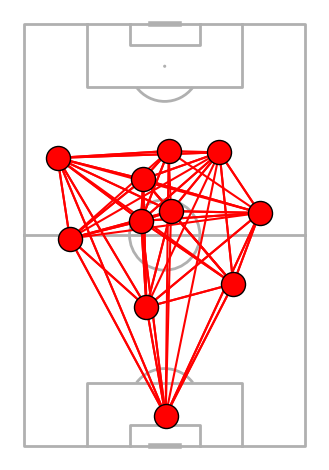

In [15]:
#Vertical pitch

pitch = VerticalPitch()

fig, ax = pitch.draw()

# plot arrows
arrows = pitch.arrows(1.2*pass_between.x, .8*pass_between.y, 1.2* pass_between.x_end, 0.8*pass_between.y_end,
                     width = 1.5, headwidth = 1.5, color ='red', ax=ax, zorder =1, alpha= 1)

nodes = pitch.scatter(1.2*avarge_locations.x, .8*avarge_locations.y,
                     s = 300, color='red', edgecolors='black', linewidth=1, alpha=1,  ax=ax)

In [16]:
#Horizontal pitch

#pitch = Pitch(pitch_type='statsbomb', pitch_color='grass')

#fig, ax = pitch.draw()

# plot arrows
#arrows = pitch.arrows(1.2*pass_between.x, .8*pass_between.y, 1.2* pass_between.x_end, 0.8*pass_between.y_end,
                     #width = 5, headwidth = 5, color ='w', ax=ax, zorder =1, alpha= 0.5)

#nodes = pitch.scatter(1.2*avarge_locations.x, .8*avarge_locations.y,
                     #s = 300, color='w', edgecolors='black', linewidth=1.5, alpha=1, zorder=1, ax=ax)
